# Plottiamo i pesi per far vedere come funzionano

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.display import display_html 
import pandas as pd
import gzip
import matplotlib as mplt

#### Import weights and biases from folder

In [2]:
n = 20 #CD 
ADAM = True # Adam or Vanilla?
SPINS = True # 0,1 or -1,1 ?
centering = False #centering trick?
one_hot = True # one hot encoding ? 
M = 2 #number of hidden variables

In [3]:
dir_name = "Weights"
name = f"Adam_{n}" if ADAM else f"Vanilla_{n}"
name += "_one_hot" if one_hot else ""
name += "_CenteringTrick" if centering else "" 
name += "_Spin" if SPINS else "_NO-Spin"
variables = ["w","a","b"]
file_names = [dir_name+"/"+name+variable+".dat" for variable in variables]

In [4]:
#Import weights
w = np.loadtxt(file_names[0]) # 20 x 6 --> each row is a bit, each column a hidden variable
a = np.loadtxt(file_names[1])
b = np.loadtxt(file_names[2])

In [5]:
np.shape(w)

(20, 2)

In [6]:
np.shape(a)

(20,)

In [7]:
np.shape(b)

(2,)

#### Define heatmap function

In [25]:
# Functions taken from https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html


title = "Visible weights, [-1,1] encoding"
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs) #im now contains the data

    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, location = "bottom", pad = 0.03,**cbar_kw) 
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)
    
    
    ax.set_xlabel(title, labelpad = 10)
    ax.xaxis.set_label_position('top')
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0,
             rotation_mode="anchor", fontsize = 11)

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [9]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    font = {"size":14}
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), fontdict = font, **kw)
            texts.append(text)

    return texts

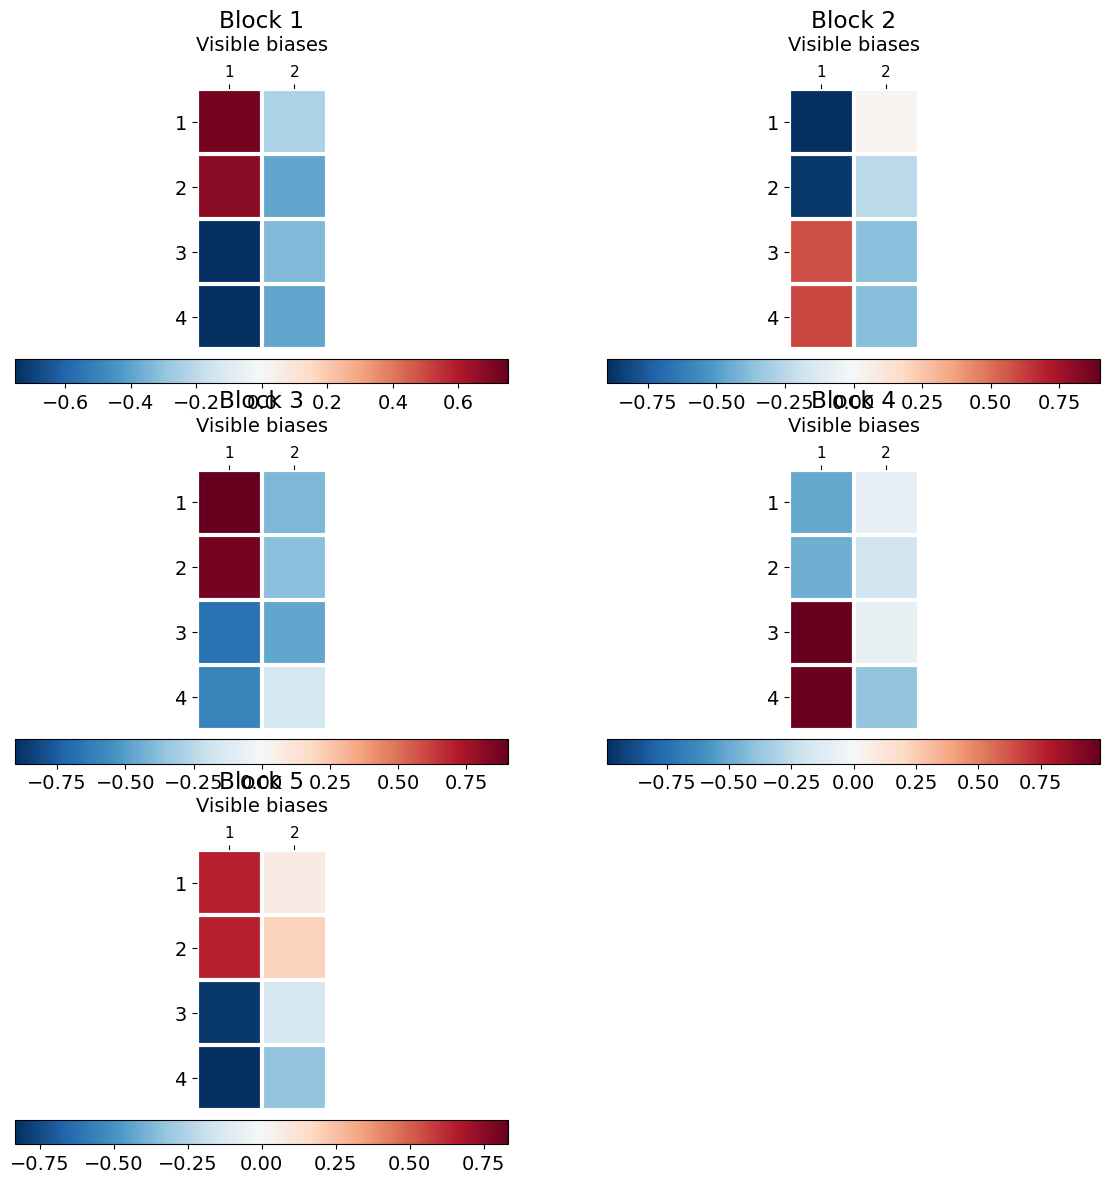

In [17]:
# We draw tables of the weights to visualize the patterns figured out by the RBM during the training 
def drawTables(w, nrows, ncols): # takes as input the weights
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (14,14))
    nBlocks = 5 # number of blocks
    for block in range(nBlocks):
        im, cbar = heatmap(w[block*4:(block+1)*4], np.arange(4)+1, np.arange(M)+1, ax = ax[block//2, block%2], cmap = "RdBu_r", cbarlabel = "weight", norm = mplt.colors.CenteredNorm())       
        ax[block//2, block%2].title.set_text("Block " + str(block+1))
    
    for axis in ax.flat[nBlocks:]:
        axis.remove()
    plt.show
    

drawTables(w,3,2)

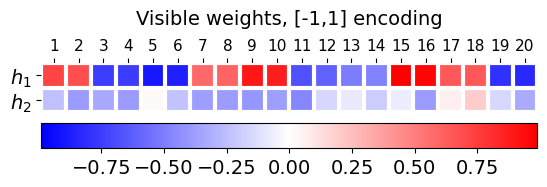

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches = (15,5) 
bits = np.arange(1,21)
hidden_variables = ["$h_1$","$h_2$"]
im, cbar = heatmap(w.T, hidden_variables, bits, ax=ax,
               cmap="bwr", norm=matplotlib.colors.CenteredNorm(), cbarlabel="AAI")


plt.savefig("grafici_pesi_11.png",bbox_inches="tight")
plt.show()

In [12]:
(1-0.1/2)**5+(0.1/2)**5

0.7737812499999998

### Plot the biases

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

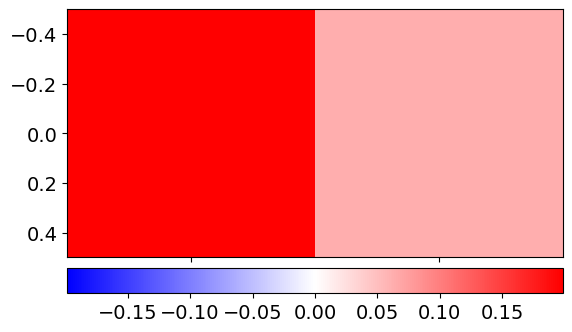

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches = (15,5) 
bits = np.arange(1,21)
b_label = ["$h_1$","$h_2$"]
labels = ["ciao"]
a = np.reshape(a,(20,1))
b = np.reshape(b,(2,1))
im, cbar = heatmap(b.T, labels , b_labels, ax=ax,
               cmap="bwr", norm=matplotlib.colors.CenteredNorm(), cbarlabel="AAI")


plt.savefig("grafici_pesi_11.png",bbox_inches="tight")
plt.show()